# 0. Problem definition

The primary goal is to predict whether a car insurance customer will make a claim. This is a binary classification problem where the model will learn to predict the value of the OUTCOME column.

This dataset contains annual car insurance data, with 18 features capturing various customer and driving behaviors. The target variable is OUTCOME, which is coded as 1 if a customer made a claim and 0 otherwise. The dataset is relatively large with 10,000 observations and includes a mix of numerical, categorical, and binary features.

Data: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data/data

# 1. Loading packages and data

In [45]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
df = pd.read_csv("/Users/kacpercieslak/desktop/PROJEKTY/car_insurance/Car_Insurance_Claim.csv")
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

# 2. Missing data

Checking for missing data

In [48]:
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [49]:
df["CREDIT_SCORE"].describe()

count    9018.000000
mean        0.515813
std         0.137688
min         0.053358
25%         0.417191
50%         0.525033
75%         0.618312
max         0.960819
Name: CREDIT_SCORE, dtype: float64

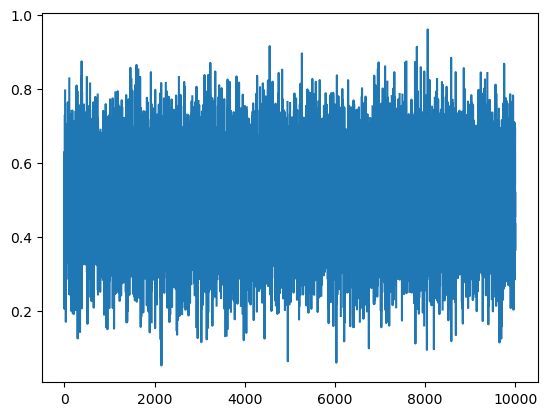

In [50]:
df["CREDIT_SCORE"].plot();

Impute missing values with the median, as it's robust to outliers.

In [51]:
df["CREDIT_SCORE"].fillna(df["CREDIT_SCORE"].median(), inplace = True)

In [52]:
df["ANNUAL_MILEAGE"].describe()

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

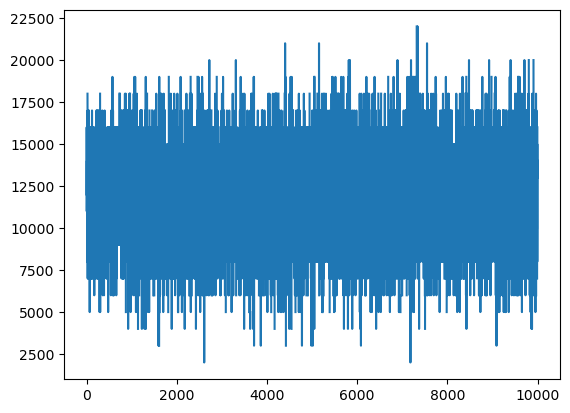

In [53]:
df["ANNUAL_MILEAGE"].plot();

Let's do this again with ANNUAL_MILEAGE

In [54]:
df["ANNUAL_MILEAGE"].fillna(df["ANNUAL_MILEAGE"].median(), inplace=True)

# 3. Data analysis

The bar chart shows that the dataset is imbalanced, but not severely, with roughly 2 times more customers who did not make a claim (0.0) than those who did (1.0). This level of imbalance is common and generally manageable for standard machine learning models

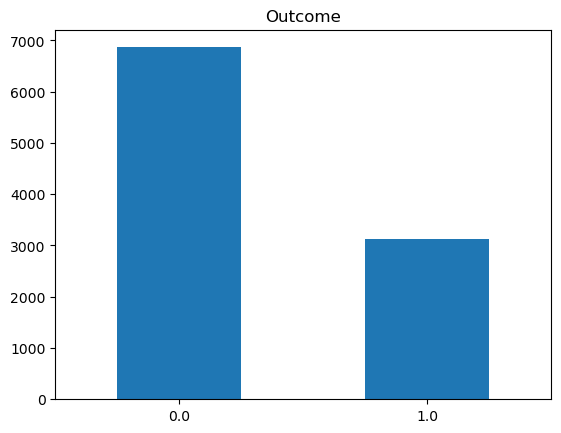

In [55]:
df['OUTCOME'].value_counts().plot(kind='bar', rot=0, title='Outcome');

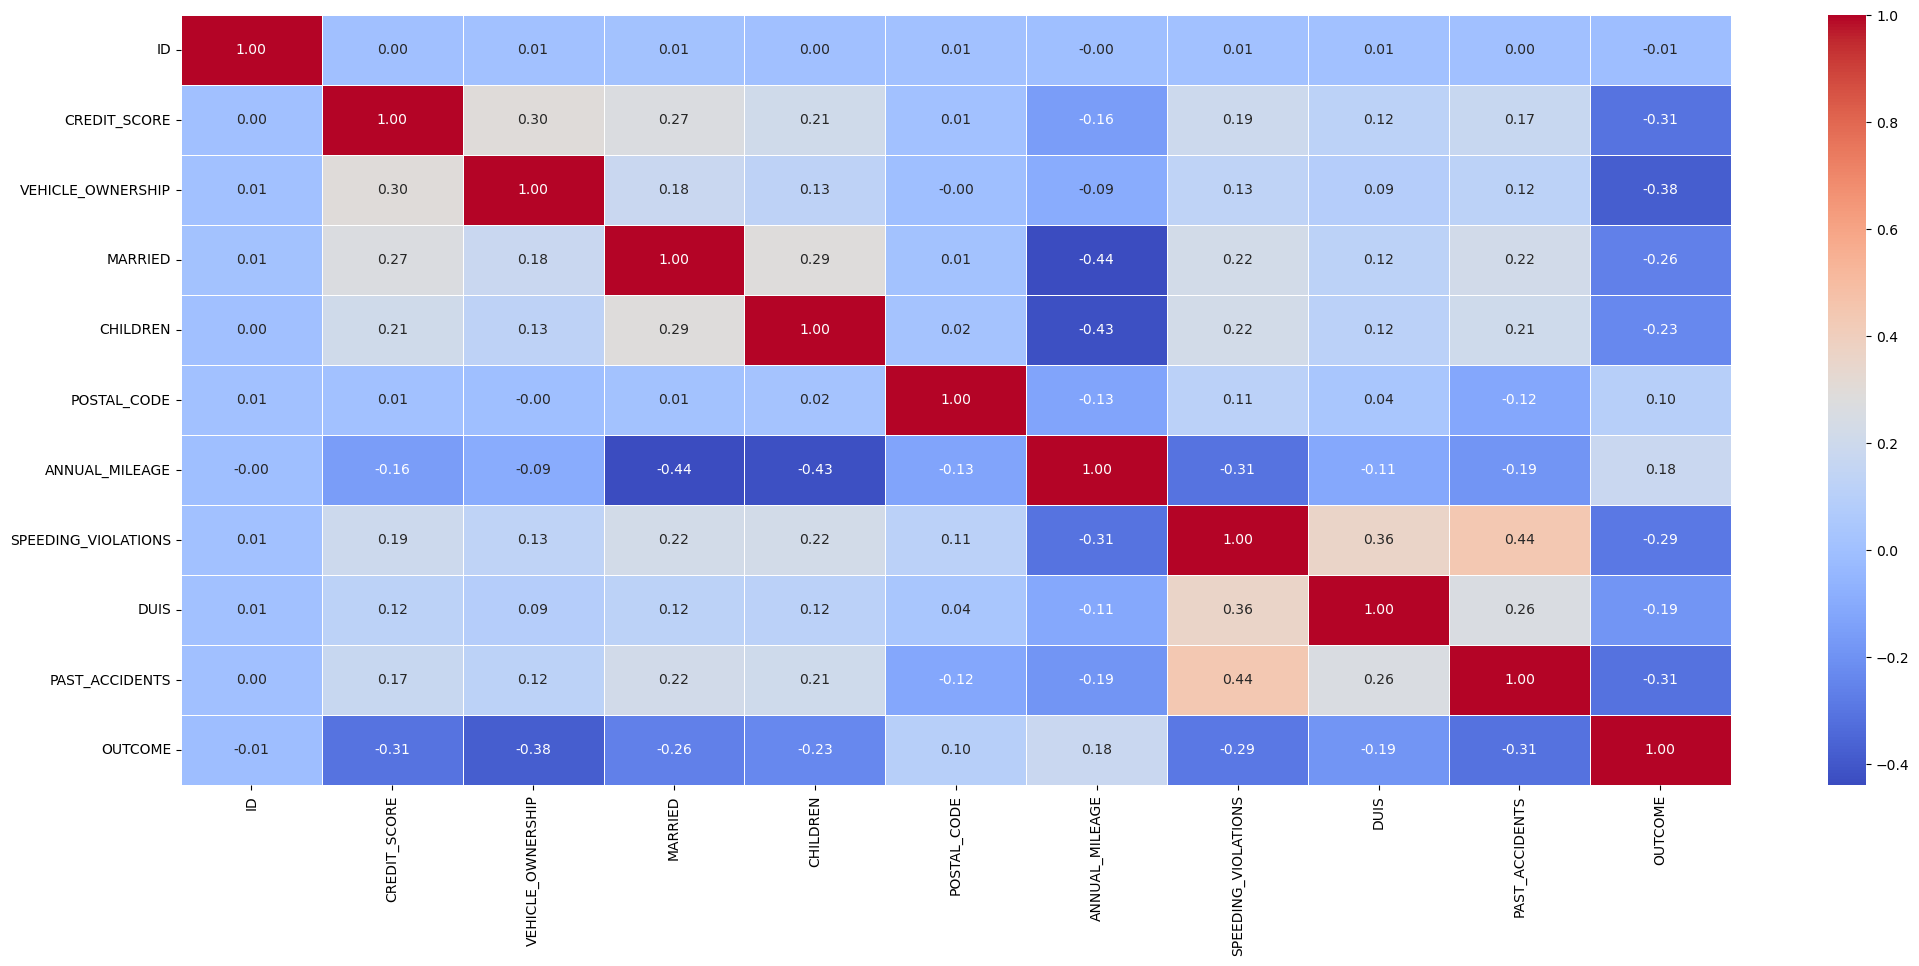

In [56]:
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");
bottom, top = ax.get_ylim()

Droping the 'ID'  and 'POSTAL_CODE' columns as they are a unique identifiers with no predictive power for the model.

In [57]:
df = df.drop(["POSTAL_CODE"], axis = 1)
df = df.drop(["ID"], axis = 1)

# 4. Preprocessing

In [58]:
df.nunique()

AGE                       4
GENDER                    2
RACE                      2
DRIVING_EXPERIENCE        4
EDUCATION                 3
INCOME                    4
CREDIT_SCORE           9019
VEHICLE_OWNERSHIP         2
VEHICLE_YEAR              2
MARRIED                   2
CHILDREN                  2
ANNUAL_MILEAGE           21
VEHICLE_TYPE              2
SPEEDING_VIOLATIONS      21
DUIS                      7
PAST_ACCIDENTS           15
OUTCOME                   2
dtype: int64

In [59]:
col_object = df.select_dtypes(include=['object']).columns
col_object

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [60]:
X = df.drop("OUTCOME", axis=1)
y = df["OUTCOME"]

We're converting categorical features into a numerical format using One-Hot Encoding.

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                col_object)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)

# 5. Creating models

I've chosen Logistic Regression, K-Nearest Neighbors, and Random Forest to compare because they represent a spectrum of machine learning approaches.

Logistic Regression is a fast and simple linear benchmark.

K-Nearest Neighbors is a non-linear, distance-based model.

Random Forest is a powerful ensemble method.

Comparing these three provides a solid basis for determining the best model for this specific problem.

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3)

In [124]:
param_grid = [(LogisticRegression(), {
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga'], 'max_iter': [10000], 'dual':[False]}), #10k to error znika
            (KNeighborsClassifier(), {
                'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                'weights': ['uniform', 'distance'],
                'p': [1, 2]}),
            (RandomForestClassifier(), {
                'n_estimators': [100, 150, 200],
                'max_features': ['sqrt', 'log2'],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]})]

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"acc": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    return metric_dict

Let's find best params

In [126]:
%time
from sklearn.metrics import accuracy_score

for i, j in param_grid:
    print("----------------------------------------------")
    print(f"{i}")
    grid_search = GridSearchCV(
        estimator=i,
        param_grid=j,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best params: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    print("----------------------------------------------")

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 14.1 µs
----------------------------------------------
LogisticRegression()
Best params: {'C': 0.1, 'dual': False, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8409
----------------------------------------------
----------------------------------------------
KNeighborsClassifier()
Best params: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best score: 0.8114
----------------------------------------------
----------------------------------------------
RandomForestClassifier()
Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8371
----------------------------------------------


### 5.1 Logistic Regression

In [158]:
np.random.seed(16)
clf = LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]

log_metrics = evaluate_preds(y_test, y_pred)
log_metrics

{'acc': 0.84, 'precision': 0.77, 'recall': 0.7, 'f1': 0.73}

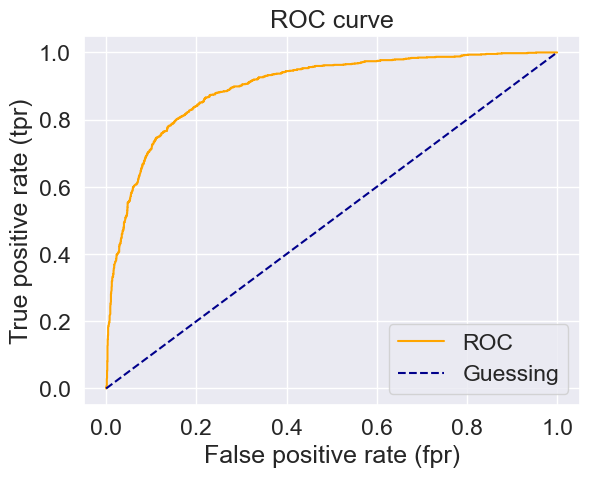

0.8981495610367892

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_probs_positive)

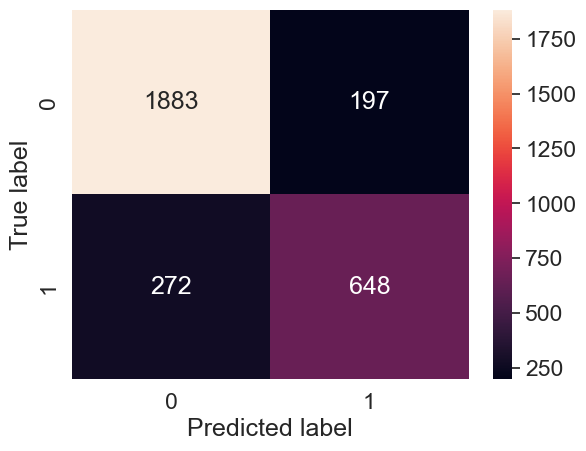

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True,   fmt="d")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 5.2 KNeighborsClassifier

In [161]:
clf = KNeighborsClassifier(n_neighbors = 15, p = 1, weights = 'uniform')
clf.fit(X_train, y_train)
y_pred_kn = clf.predict(X_test)
y_probs_kn = clf.predict_proba(X_test)
y_probs_positive_kn = y_probs[:, 1]

kn_metrics = evaluate_preds(y_test, y_pred_kn)
kn_metrics

{'acc': 0.82, 'precision': 0.71, 'recall': 0.67, 'f1': 0.69}

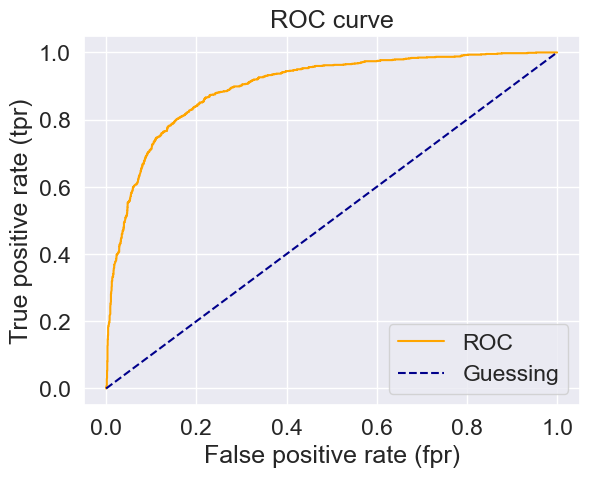

0.8981495610367892

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive_kn)
    
plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_probs_positive_kn)

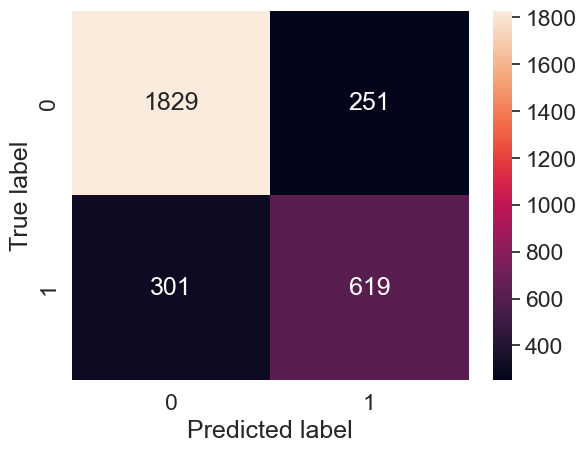

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_pred_kn)

sns.heatmap(conf_mat, annot=True,   fmt="d")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### 5.3 RandomForestClassifier

In [164]:
clf = RandomForestClassifier(max_depth = 10, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 10, n_estimators = 200)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
y_probs_rf = clf.predict_proba(X_test)
y_probs_positive_rf = y_probs[:, 1]

rf_metrics = evaluate_preds(y_test, y_pred_rf)
rf_metrics

{'acc': 0.84, 'precision': 0.76, 'recall': 0.72, 'f1': 0.74}

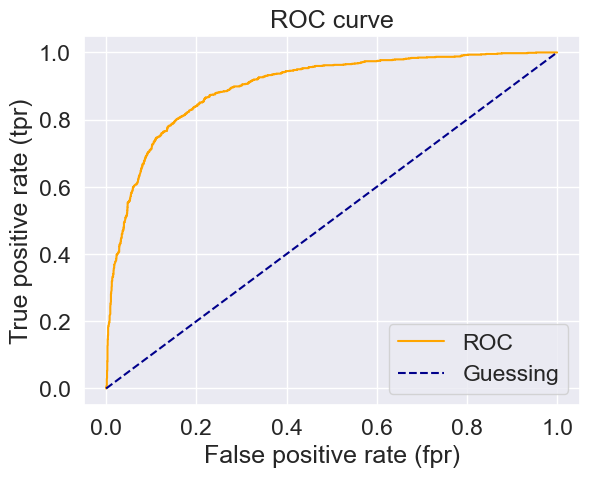

0.8981495610367892

In [165]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive_rf)
    
plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_probs_positive_rf)

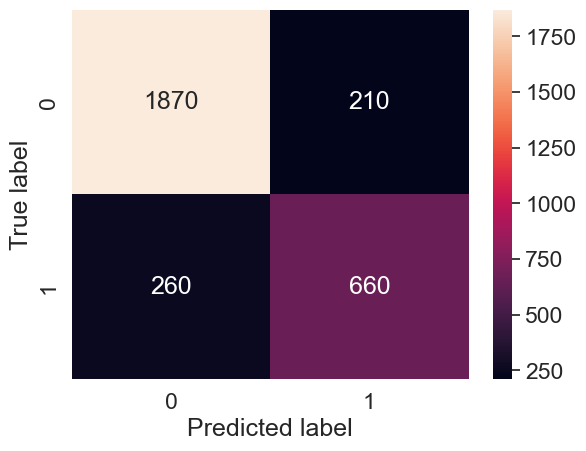

In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_mat, annot=True,   fmt="d")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# 6. Summary

### Based on the metrics, the Logistic Regression and RandomForestClassifier models are the best performers, achieving an accuracy of 84%.

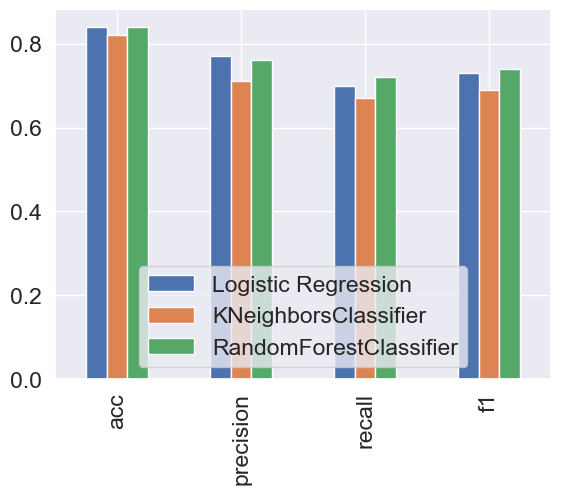

In [167]:
compare_metrics = pd.DataFrame({"Logistic Regression": log_metrics,
                                "KNeighborsClassifier": kn_metrics,
                                "RandomForestClassifier": rf_metrics
                               })

compare_metrics.plot.bar();